## Import Modules

In [107]:
from fbprophet import Prophet
import pandas as pd

## Initiate Model

In [108]:
# model = Prophet(growth = 'logistic')

## Read Data

In [110]:
df = pd.read_csv('./Final Files fbprophet/Combined_Data_for_model_final_2.csv')

In [111]:
df

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,0,2016-01-01 00:15:00,4099.37,11.0,7.0,76.36,0.0,0.0,27.4,1.0
1,1,2016-01-01 00:30:00,3995.64,11.0,7.0,76.36,0.0,0.0,27.4,1.0
2,2,2016-01-01 00:45:00,3954.80,11.0,7.0,76.36,0.0,0.0,27.4,1.0
3,3,2016-01-01 01:00:00,3904.93,11.0,8.0,81.75,0.0,0.0,27.4,1.0
4,4,2016-01-01 01:15:00,3654.68,11.0,8.0,81.75,0.0,0.0,27.4,1.0
...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


In [112]:
df['Date'] = pd.to_datetime(df['Date'])

In [113]:
df

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,0,2016-01-01 00:15:00,4099.37,11.0,7.0,76.36,0.0,0.0,27.4,1.0
1,1,2016-01-01 00:30:00,3995.64,11.0,7.0,76.36,0.0,0.0,27.4,1.0
2,2,2016-01-01 00:45:00,3954.80,11.0,7.0,76.36,0.0,0.0,27.4,1.0
3,3,2016-01-01 01:00:00,3904.93,11.0,8.0,81.75,0.0,0.0,27.4,1.0
4,4,2016-01-01 01:15:00,3654.68,11.0,8.0,81.75,0.0,0.0,27.4,1.0
...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


## Multivariate Forecasting

In [114]:
dfmv = df[['Date', 'Haryana Load (MW)', 'temp', 'dew', 'humidity', 'cloudcover', 'windspeed', 'winddir', 'visibility']]

In [115]:
dfmv

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
0,2016-01-01 00:15:00,4099.37,11.0,7.0,76.36,27.4,0.0,0.0,1.0
1,2016-01-01 00:30:00,3995.64,11.0,7.0,76.36,27.4,0.0,0.0,1.0
2,2016-01-01 00:45:00,3954.80,11.0,7.0,76.36,27.4,0.0,0.0,1.0
3,2016-01-01 01:00:00,3904.93,11.0,8.0,81.75,27.4,0.0,0.0,1.0
4,2016-01-01 01:15:00,3654.68,11.0,8.0,81.75,27.4,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [116]:
dfmv.head()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
0,2016-01-01 00:15:00,4099.37,11.0,7.0,76.36,27.4,0.0,0.0,1.0
1,2016-01-01 00:30:00,3995.64,11.0,7.0,76.36,27.4,0.0,0.0,1.0
2,2016-01-01 00:45:00,3954.80,11.0,7.0,76.36,27.4,0.0,0.0,1.0
3,2016-01-01 01:00:00,3904.93,11.0,8.0,81.75,27.4,0.0,0.0,1.0
4,2016-01-01 01:15:00,3654.68,11.0,8.0,81.75,27.4,0.0,0.0,1.0


In [117]:
dfmv.tail()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210430,2021-12-31 23:45:00,4449.94,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [118]:
dfmv = dfmv.rename(columns = {'Date':'ds', 'Haryana Load (MW)':'y'})

In [119]:
import holidays

In [120]:
# HR_holidays = holidays.country_holidays('IN', subdiv='HR')

In [121]:
# HR_holidays[2016]

In [122]:
mv_model = Prophet(growth='logistic')

In [123]:
mv_model.add_regressor('temp')
mv_model.add_regressor('dew')
mv_model.add_regressor('humidity')

mv_model.add_regressor('cloudcover')

mv_model.add_regressor('windspeed')
mv_model.add_regressor('winddir')
mv_model.add_regressor('visibility')

## Now add Train-Test Split

In [124]:
train_size = int(dfmv.shape[0]*0.7)

In [125]:
df_train = dfmv.iloc[:train_size]

In [126]:
# test_size = dfuv.shape[0] - train_size

In [127]:
df_test = dfmv[train_size:]

In [128]:
df_train['cap'] = 6000

C:\Users\HP\AppData\Local\Temp/ipykernel_8852/1207476209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cap'] = 6000


In [129]:
df_train

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
0,2016-01-01 00:15:00,4099.37,11.0,7.0,76.36,27.4,0.0,0.0,1.0,6000
1,2016-01-01 00:30:00,3995.64,11.0,7.0,76.36,27.4,0.0,0.0,1.0,6000
2,2016-01-01 00:45:00,3954.80,11.0,7.0,76.36,27.4,0.0,0.0,1.0,6000
3,2016-01-01 01:00:00,3904.93,11.0,8.0,81.75,27.4,0.0,0.0,1.0,6000
4,2016-01-01 01:15:00,3654.68,11.0,8.0,81.75,27.4,0.0,0.0,1.0,6000
...,...,...,...,...,...,...,...,...,...,...
147296,2020-03-14 08:15:00,4396.38,18.2,16.5,89.40,55.7,6.4,85.0,2.0,6000
147297,2020-03-14 08:30:00,4479.17,18.2,16.5,89.40,55.7,6.4,85.0,2.0,6000
147298,2020-03-14 08:45:00,4493.16,18.2,16.5,89.40,55.7,6.4,85.0,2.0,6000
147299,2020-03-14 09:00:00,4543.41,19.0,17.0,88.19,37.1,11.2,100.0,2.0,6000


## Fit model on Train Dataset

In [130]:
mv_model.fit(df_train)

## Save model

In [131]:
from prophet.serialize import model_to_json, model_from_json

with open('Complete_mv_model.json', 'w') as fout:
    fout.write(model_to_json(mv_model))  # Save model

with open('Complete_mv_model.json', 'r') as fin:
    saved_mv_model = model_from_json(fin.read())  # Load model

In [47]:
# import pickle

In [48]:
# import joblib

In [49]:
# joblib.dump(mv_model, 'logistic_mv_all_model_good.pkl')

In [50]:
# saved_mv_model = joblib.load('logistic_mv_all_model_good.pkl')

In [132]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility
147301,2020-03-14 09:30:00,4637.64,19.0,17.0,88.19,37.1,11.2,100.0,2.0
147302,2020-03-14 09:45:00,4652.91,19.0,17.0,88.19,37.1,11.2,100.0,2.0
147303,2020-03-14 10:00:00,4636.97,21.0,16.0,73.11,37.1,13.0,90.0,3.0
147304,2020-03-14 10:15:00,4569.88,21.0,16.0,73.11,37.1,13.0,90.0,3.0
147305,2020-03-14 10:30:00,4514.03,21.0,16.0,73.11,37.1,13.0,90.0,3.0
...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [133]:
df_test['cap'] = 6000

C:\Users\HP\AppData\Local\Temp/ipykernel_8852/3138556019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['cap'] = 6000


In [134]:
test_ds = df_test.drop(columns='y')

In [135]:
test_ds

,ds,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
147301,2020-03-14 09:30:00,19.0,17.0,88.19,37.1,11.2,100.0,2.0,6000
147302,2020-03-14 09:45:00,19.0,17.0,88.19,37.1,11.2,100.0,2.0,6000
147303,2020-03-14 10:00:00,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
147304,2020-03-14 10:15:00,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
147305,2020-03-14 10:30:00,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
210427,2021-12-31 23:00:00,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
210428,2021-12-31 23:15:00,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
210429,2021-12-31 23:30:00,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [136]:
# test_ds = pd.DataFrame(df_test['ds'])

In [137]:
# test_ds

## Make Forecast on Test Dataset

In [138]:
forecast = saved_mv_model.predict(test_ds)

In [139]:
test_forecast = forecast

In [140]:
test_forecast.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-14 09:30:00,5998.764221,6000,3001.359191,5134.728570,5998.764221,5998.764221,-1953.013295,-1953.013295,-1953.013295,...,-30.242481,-30.242481,-30.242481,-1097.616402,-1097.616402,-1097.616402,0.0,0.0,0.0,4045.750926
1,2020-03-14 09:45:00,5998.764310,6000,2904.604150,5080.266792,5998.764310,5998.764310,-1987.036959,-1987.036959,-1987.036959,...,-30.242481,-30.242481,-30.242481,-1097.803297,-1097.803297,-1097.803297,0.0,0.0,0.0,4011.727351
2,2020-03-14 10:00:00,5998.764399,6000,3218.737325,5297.497415,5998.764399,5998.764399,-1746.089702,-1746.089702,-1746.089702,...,-46.731354,-46.731354,-46.731354,-1097.990272,-1097.990272,-1097.990272,0.0,0.0,0.0,4252.674697
3,2020-03-14 10:15:00,5998.764488,6000,3162.142518,5288.576511,5998.764488,5998.764488,-1755.978561,-1755.978561,-1755.978561,...,-46.731354,-46.731354,-46.731354,-1098.177327,-1098.177327,-1098.177327,0.0,0.0,0.0,4242.785928
4,2020-03-14 10:30:00,5998.764577,6000,3242.298011,5330.079536,5998.764577,5998.764577,-1754.472543,-1754.472543,-1754.472543,...,-46.731354,-46.731354,-46.731354,-1098.364462,-1098.364462,-1098.364462,0.0,0.0,0.0,4244.292034


In [141]:
test_forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
63125,2021-12-31 22:45:00,5999.986926,6000,4178.648883,6299.186367,5999.975718,5999.992889,-800.068882,-800.068882,-800.068882,...,72.354954,72.354954,72.354954,-217.238667,-217.238667,-217.238667,0.0,0.0,0.0,5199.918044
63126,2021-12-31 23:00:00,5999.986927,6000,4108.357508,6232.913561,5999.975720,5999.992890,-847.677526,-847.677526,-847.677526,...,72.354954,72.354954,72.354954,-217.159207,-217.159207,-217.159207,0.0,0.0,0.0,5152.309401
63127,2021-12-31 23:15:00,5999.986928,6000,4024.092185,6119.461600,5999.975721,5999.992890,-899.368438,-899.368438,-899.368438,...,72.354954,72.354954,72.354954,-217.079967,-217.079967,-217.079967,0.0,0.0,0.0,5100.618490
63128,2021-12-31 23:30:00,5999.986929,6000,3925.466701,6173.052405,5999.975723,5999.992891,-946.834970,-946.834970,-946.834970,...,72.354954,72.354954,72.354954,-217.000946,-217.000946,-217.000946,0.0,0.0,0.0,5053.151958
63129,2021-12-31 23:45:00,5999.986930,6000,3897.554035,6030.343222,5999.975724,5999.992892,-989.520060,-989.520060,-989.520060,...,72.354954,72.354954,72.354954,-216.922145,-216.922145,-216.922145,0.0,0.0,0.0,5010.466870


In [142]:
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-14 09:30:00,4045.750926,3001.359191,5134.728570
1,2020-03-14 09:45:00,4011.727351,2904.604150,5080.266792
2,2020-03-14 10:00:00,4252.674697,3218.737325,5297.497415
3,2020-03-14 10:15:00,4242.785928,3162.142518,5288.576511
4,2020-03-14 10:30:00,4244.292034,3242.298011,5330.079536
...,...,...,...,...
63125,2021-12-31 22:45:00,5199.918044,4178.648883,6299.186367
63126,2021-12-31 23:00:00,5152.309401,4108.357508,6232.913561
63127,2021-12-31 23:15:00,5100.618490,4024.092185,6119.461600
63128,2021-12-31 23:30:00,5053.151958,3925.466701,6173.052405


## Plot test forecast with actual values

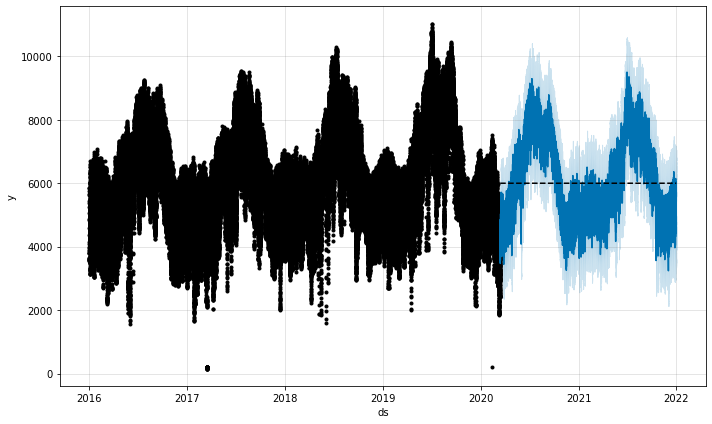

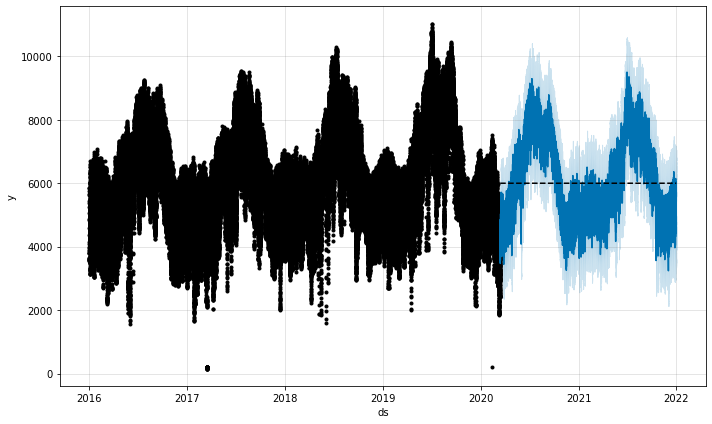

In [143]:
saved_mv_model.plot(test_forecast)

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

## Plot Actual Test Values

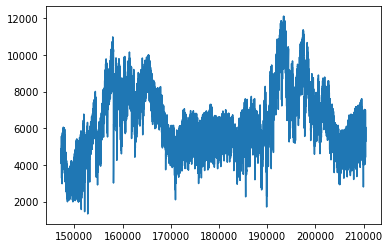

In [145]:
plt.plot(df_test['y'])
# plt.ylim([0, 12000])

## Plotting test forecast with actual test values

In [146]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
147301,2020-03-14 09:30:00,4637.64,19.0,17.0,88.19,37.1,11.2,100.0,2.0,6000
147302,2020-03-14 09:45:00,4652.91,19.0,17.0,88.19,37.1,11.2,100.0,2.0,6000
147303,2020-03-14 10:00:00,4636.97,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
147304,2020-03-14 10:15:00,4569.88,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
147305,2020-03-14 10:30:00,4514.03,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
...,...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [147]:
test_forecast.reset_index(inplace=True)

In [148]:
df_test.reset_index(inplace=True)

In [149]:
df_test

,index,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
0,147301,2020-03-14 09:30:00,4637.64,19.0,17.0,88.19,37.1,11.2,100.0,2.0,6000
1,147302,2020-03-14 09:45:00,4652.91,19.0,17.0,88.19,37.1,11.2,100.0,2.0,6000
2,147303,2020-03-14 10:00:00,4636.97,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
3,147304,2020-03-14 10:15:00,4569.88,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
4,147305,2020-03-14 10:30:00,4514.03,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
...,...,...,...,...,...,...,...,...,...,...,...
63125,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
63126,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
63127,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
63128,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [150]:
test_forecast

,index,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-03-14 09:30:00,5998.764221,6000,3001.359191,5134.728570,5998.764221,5998.764221,-1953.013295,-1953.013295,...,-30.242481,-30.242481,-30.242481,-1097.616402,-1097.616402,-1097.616402,0.0,0.0,0.0,4045.750926
1,1,2020-03-14 09:45:00,5998.764310,6000,2904.604150,5080.266792,5998.764310,5998.764310,-1987.036959,-1987.036959,...,-30.242481,-30.242481,-30.242481,-1097.803297,-1097.803297,-1097.803297,0.0,0.0,0.0,4011.727351
2,2,2020-03-14 10:00:00,5998.764399,6000,3218.737325,5297.497415,5998.764399,5998.764399,-1746.089702,-1746.089702,...,-46.731354,-46.731354,-46.731354,-1097.990272,-1097.990272,-1097.990272,0.0,0.0,0.0,4252.674697
3,3,2020-03-14 10:15:00,5998.764488,6000,3162.142518,5288.576511,5998.764488,5998.764488,-1755.978561,-1755.978561,...,-46.731354,-46.731354,-46.731354,-1098.177327,-1098.177327,-1098.177327,0.0,0.0,0.0,4242.785928
4,4,2020-03-14 10:30:00,5998.764577,6000,3242.298011,5330.079536,5998.764577,5998.764577,-1754.472543,-1754.472543,...,-46.731354,-46.731354,-46.731354,-1098.364462,-1098.364462,-1098.364462,0.0,0.0,0.0,4244.292034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63125,63125,2021-12-31 22:45:00,5999.986926,6000,4178.648883,6299.186367,5999.975718,5999.992889,-800.068882,-800.068882,...,72.354954,72.354954,72.354954,-217.238667,-217.238667,-217.238667,0.0,0.0,0.0,5199.918044
63126,63126,2021-12-31 23:00:00,5999.986927,6000,4108.357508,6232.913561,5999.975720,5999.992890,-847.677526,-847.677526,...,72.354954,72.354954,72.354954,-217.159207,-217.159207,-217.159207,0.0,0.0,0.0,5152.309401
63127,63127,2021-12-31 23:15:00,5999.986928,6000,4024.092185,6119.461600,5999.975721,5999.992890,-899.368438,-899.368438,...,72.354954,72.354954,72.354954,-217.079967,-217.079967,-217.079967,0.0,0.0,0.0,5100.618490
63128,63128,2021-12-31 23:30:00,5999.986929,6000,3925.466701,6173.052405,5999.975723,5999.992891,-946.834970,-946.834970,...,72.354954,72.354954,72.354954,-217.000946,-217.000946,-217.000946,0.0,0.0,0.0,5053.151958


In [151]:
df_test.drop(columns='index')

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
0,2020-03-14 09:30:00,4637.64,19.0,17.0,88.19,37.1,11.2,100.0,2.0,6000
1,2020-03-14 09:45:00,4652.91,19.0,17.0,88.19,37.1,11.2,100.0,2.0,6000
2,2020-03-14 10:00:00,4636.97,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
3,2020-03-14 10:15:00,4569.88,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
4,2020-03-14 10:30:00,4514.03,21.0,16.0,73.11,37.1,13.0,90.0,3.0,6000
...,...,...,...,...,...,...,...,...,...,...
63125,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
63126,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
63127,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
63128,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [152]:
test_forecast

,index,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-03-14 09:30:00,5998.764221,6000,3001.359191,5134.728570,5998.764221,5998.764221,-1953.013295,-1953.013295,...,-30.242481,-30.242481,-30.242481,-1097.616402,-1097.616402,-1097.616402,0.0,0.0,0.0,4045.750926
1,1,2020-03-14 09:45:00,5998.764310,6000,2904.604150,5080.266792,5998.764310,5998.764310,-1987.036959,-1987.036959,...,-30.242481,-30.242481,-30.242481,-1097.803297,-1097.803297,-1097.803297,0.0,0.0,0.0,4011.727351
2,2,2020-03-14 10:00:00,5998.764399,6000,3218.737325,5297.497415,5998.764399,5998.764399,-1746.089702,-1746.089702,...,-46.731354,-46.731354,-46.731354,-1097.990272,-1097.990272,-1097.990272,0.0,0.0,0.0,4252.674697
3,3,2020-03-14 10:15:00,5998.764488,6000,3162.142518,5288.576511,5998.764488,5998.764488,-1755.978561,-1755.978561,...,-46.731354,-46.731354,-46.731354,-1098.177327,-1098.177327,-1098.177327,0.0,0.0,0.0,4242.785928
4,4,2020-03-14 10:30:00,5998.764577,6000,3242.298011,5330.079536,5998.764577,5998.764577,-1754.472543,-1754.472543,...,-46.731354,-46.731354,-46.731354,-1098.364462,-1098.364462,-1098.364462,0.0,0.0,0.0,4244.292034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63125,63125,2021-12-31 22:45:00,5999.986926,6000,4178.648883,6299.186367,5999.975718,5999.992889,-800.068882,-800.068882,...,72.354954,72.354954,72.354954,-217.238667,-217.238667,-217.238667,0.0,0.0,0.0,5199.918044
63126,63126,2021-12-31 23:00:00,5999.986927,6000,4108.357508,6232.913561,5999.975720,5999.992890,-847.677526,-847.677526,...,72.354954,72.354954,72.354954,-217.159207,-217.159207,-217.159207,0.0,0.0,0.0,5152.309401
63127,63127,2021-12-31 23:15:00,5999.986928,6000,4024.092185,6119.461600,5999.975721,5999.992890,-899.368438,-899.368438,...,72.354954,72.354954,72.354954,-217.079967,-217.079967,-217.079967,0.0,0.0,0.0,5100.618490
63128,63128,2021-12-31 23:30:00,5999.986929,6000,3925.466701,6173.052405,5999.975723,5999.992891,-946.834970,-946.834970,...,72.354954,72.354954,72.354954,-217.000946,-217.000946,-217.000946,0.0,0.0,0.0,5053.151958


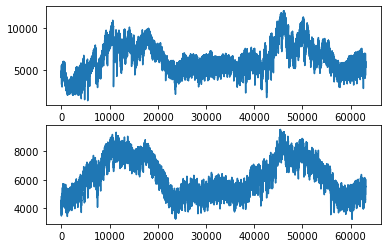

In [153]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

<function matplotlib.pyplot.show(close=None, block=None)>

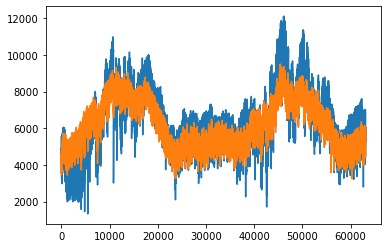

In [154]:
plt.plot(df_test['y'])
plt.plot(test_forecast['yhat'])
plt.show

## Alignment Check

## Don't run alignment cells for now

In [49]:
# test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:30:00'].index, inplace=True)

In [50]:
# test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:45:00'].index, inplace=True)

In [51]:
# test_forecast.sort_index(inplace=True)

In [52]:
# df_test.sort_index(inplace=True)

In [53]:
# df_test.drop(columns='index', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
# test_forecast.drop(columns='index', inplace=True)

In [55]:
# test_forecast['ds'].shape == df_test['ds'].shape

True

In [56]:
# test_forecast['ds'].dtype #== df_test['ds'].dtype

dtype('<M8[ns]')

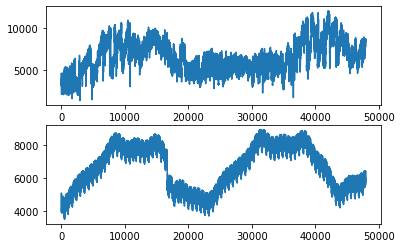

In [57]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(df_test['y'])
# ax[1].plot(test_forecast['yhat'])

In [58]:
# test_forecast['ds'][0] 

Timestamp('2020-03-09 00:00:00')

In [59]:
# df_test['ds'][0]

'2020-03-09 14:45:00'

In [65]:
# test_forecast = test_forecast.loc[test_forecast.ds >= '2020-03-09 14:45:00']

In [67]:
# test_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1,2020-03-09 14:45:00,5900.296544,3171.916007,5481.531455,5900.296544,5900.296544,-1570.946404,-1570.946404,-1570.946404,-61.846437,...,-109.914857,-109.914857,-109.914857,-1399.185110,-1399.185110,-1399.185110,0.0,0.0,0.0,4329.350140
2,2020-03-09 15:00:00,5900.302799,3077.165376,5498.388928,5900.302799,5900.302799,-1623.693847,-1623.693847,-1623.693847,-119.318514,...,-105.157344,-105.157344,-105.157344,-1399.217989,-1399.217989,-1399.217989,0.0,0.0,0.0,4276.608952
3,2020-03-09 15:15:00,5900.309054,3066.869840,5327.756634,5900.309054,5900.309054,-1669.584775,-1669.584775,-1669.584775,-169.916058,...,-100.417891,-100.417891,-100.417891,-1399.250826,-1399.250826,-1399.250826,0.0,0.0,0.0,4230.724280
4,2020-03-09 15:30:00,5900.315309,3079.373219,5423.713692,5900.315309,5900.315309,-1705.636293,-1705.636293,-1705.636293,-210.654249,...,-95.698424,-95.698424,-95.698424,-1399.283620,-1399.283620,-1399.283620,0.0,0.0,0.0,4194.679017
5,2020-03-09 15:45:00,5900.321564,3004.327760,5337.678558,5900.321564,5900.321564,-1729.323872,-1729.323872,-1729.323872,-239.006654,...,-91.000844,-91.000844,-91.000844,-1399.316374,-1399.316374,-1399.316374,0.0,0.0,0.0,4170.997693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47940,2021-12-31 22:45:00,6298.023692,2654.680851,8900.592688,3384.662319,8921.753386,-329.310619,-329.310619,-329.310619,129.036825,...,112.260161,112.260161,112.260161,-570.607605,-570.607605,-570.607605,0.0,0.0,0.0,5968.713073
47941,2021-12-31 23:00:00,6298.029948,2590.503862,8722.852109,3384.626040,8921.964441,-391.839718,-391.839718,-391.839718,66.243844,...,112.498764,112.498764,112.498764,-570.582325,-570.582325,-570.582325,0.0,0.0,0.0,5906.190230
47942,2021-12-31 23:15:00,6298.036203,2517.721908,8791.146777,3384.589761,8922.175495,-451.199784,-451.199784,-451.199784,6.650845,...,112.706962,112.706962,112.706962,-570.557591,-570.557591,-570.557591,0.0,0.0,0.0,5846.836418
47943,2021-12-31 23:30:00,6298.042458,2315.394237,8732.876186,3384.553482,8922.386549,-506.743298,-506.743298,-506.743298,-49.093332,...,112.883437,112.883437,112.883437,-570.533404,-570.533404,-570.533404,0.0,0.0,0.0,5791.299160


In [68]:
# df_test.iloc[:test_forecast.shape[0]]

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
0,2020-03-09 14:45:00,3894.86,24.9,11.6,43.40,0.0,20.2,283
1,2020-03-09 15:00:00,3851.25,24.1,10.1,41.18,0.0,20.5,280
2,2020-03-09 15:15:00,3465.93,24.1,10.1,41.18,0.0,20.5,280
3,2020-03-09 15:30:00,3306.17,24.1,10.1,41.18,0.0,20.5,280
4,2020-03-09 15:45:00,3258.34,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...,...
47937,2021-09-09 22:45:00,8625.34,29.0,27.0,88.99,89.0,9.4,100
47938,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
47939,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
47940,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82


In [93]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(df_test['y'])
# ax[1].plot(test_forecast['yhat'])

## Alignment Done

## To Send

In [165]:
new_df = pd.DataFrame(df_test['ds'])

In [166]:
new_df['Actual'] = df_test['y']

In [167]:
new_df['Predicted'] = test_forecast['yhat']

In [168]:
new_df['yhat_upper'], new_df['yhat_lower'] = test_forecast['yhat_upper'], test_forecast['yhat_lower']

In [169]:
new_df

,ds,Actual,Predicted,yhat_upper,yhat_lower
0,2020-03-14 09:30:00,4637.64,4045.750926,5134.728570,3001.359191
1,2020-03-14 09:45:00,4652.91,4011.727351,5080.266792,2904.604150
2,2020-03-14 10:00:00,4636.97,4252.674697,5297.497415,3218.737325
3,2020-03-14 10:15:00,4569.88,4242.785928,5288.576511,3162.142518
4,2020-03-14 10:30:00,4514.03,4244.292034,5330.079536,3242.298011
...,...,...,...,...,...
63125,2021-12-31 22:45:00,4712.55,5199.918044,6299.186367,4178.648883
63126,2021-12-31 23:00:00,4649.58,5152.309401,6232.913561,4108.357508
63127,2021-12-31 23:15:00,4571.39,5100.618490,6119.461600,4024.092185
63128,2021-12-31 23:30:00,4510.39,5053.151958,6173.052405,3925.466701


In [170]:
df_to_send = new_df

In [171]:
df_to_send.rename(columns={'ds':'Date'}, inplace=True)

In [172]:
df_to_send

,Date,Actual,Predicted,yhat_upper,yhat_lower
0,2020-03-14 09:30:00,4637.64,4045.750926,5134.728570,3001.359191
1,2020-03-14 09:45:00,4652.91,4011.727351,5080.266792,2904.604150
2,2020-03-14 10:00:00,4636.97,4252.674697,5297.497415,3218.737325
3,2020-03-14 10:15:00,4569.88,4242.785928,5288.576511,3162.142518
4,2020-03-14 10:30:00,4514.03,4244.292034,5330.079536,3242.298011
...,...,...,...,...,...
63125,2021-12-31 22:45:00,4712.55,5199.918044,6299.186367,4178.648883
63126,2021-12-31 23:00:00,4649.58,5152.309401,6232.913561,4108.357508
63127,2021-12-31 23:15:00,4571.39,5100.618490,6119.461600,4024.092185
63128,2021-12-31 23:30:00,4510.39,5053.151958,6173.052405,3925.466701


In [173]:
df_to_send.to_csv('test_set_actual_predictions_2016_onwards_data.csv')

In [175]:
df_to_send[df_to_send['Date'] == '2020-03-15 00:00:00']

,Date,Actual,Predicted,yhat_upper,yhat_lower
58,2020-03-15,3751.58,3852.130266,4940.328895,2785.603922


In [185]:
first_month_test = df_to_send[58:58+96*31]

In [233]:
first_month_test.reset_index(inplace=True)

In [234]:
first_month_test

,index,Date,Actual,Predicted,yhat_upper,yhat_lower
0,58,2020-03-15 00:00:00,3751.58,3852.130266,4940.328895,2785.603922
1,59,2020-03-15 00:15:00,3547.97,3813.500706,4901.415159,2656.944086
2,60,2020-03-15 00:30:00,3489.70,3780.105239,4835.657414,2743.317837
3,61,2020-03-15 00:45:00,3430.30,3751.853346,4879.189622,2693.973726
4,62,2020-03-15 01:00:00,3390.71,3728.641110,4818.450484,2635.896532
...,...,...,...,...,...,...
2971,3029,2020-04-14 22:45:00,5159.84,5605.550469,6698.239450,4601.434451
2972,3030,2020-04-14 23:00:00,5080.25,5320.618814,6345.907373,4316.848883
2973,3031,2020-04-14 23:15:00,5002.99,5267.212162,6308.982542,4188.015398
2974,3032,2020-04-14 23:30:00,4912.71,5218.100550,6208.414738,4169.772997


In [232]:
last_month_test = df_to_send[-96*31:]
last_month_test.reset_index(inplace=True)
last_month_test

,index,Date,Actual,Predicted,yhat_upper,yhat_lower
0,60154,2021-12-01 00:00:00,4297.50,4445.951164,5494.340947,3432.989036
1,60155,2021-12-01 00:15:00,4213.90,4412.169847,5518.371178,3354.397204
2,60156,2021-12-01 00:30:00,4153.19,4383.638233,5363.951798,3299.374567
3,60157,2021-12-01 00:45:00,4178.42,4360.263880,5547.418216,3222.237289
4,60158,2021-12-01 01:00:00,4150.80,4454.497028,5490.389632,3419.329644
...,...,...,...,...,...,...
2971,63125,2021-12-31 22:45:00,4712.55,5199.918044,6299.186367,4178.648883
2972,63126,2021-12-31 23:00:00,4649.58,5152.309401,6232.913561,4108.357508
2973,63127,2021-12-31 23:15:00,4571.39,5100.618490,6119.461600,4024.092185
2974,63128,2021-12-31 23:30:00,4510.39,5053.151958,6173.052405,3925.466701


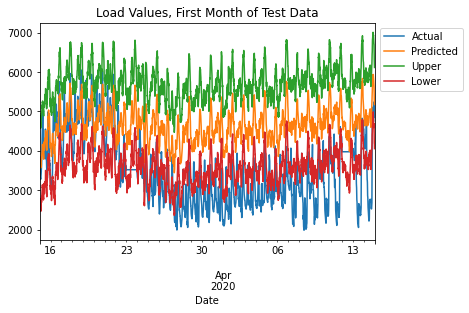

<Figure size 432x288 with 0 Axes>

In [242]:
plt1 = first_month_test.plot(x='Date', y=['Actual', 'Predicted', 'yhat_upper', 'yhat_lower'], title='Load Values, First Month of Test Data')
# plt1.legend(["Actual"], bbox_to_anchor=(1.0,1.0))
# plt1 = new_df.plot(x="Date", y= ["Predicted", 'yhat_upper', 'yhat_lower'], ax=plt1, title= "Matic")
plt1.legend(['Actual', "Predicted", "Upper", "Lower"], bbox_to_anchor=(1.0,1.0))
plt.show()
plt.savefig('first_month_test_complete_data.jpg')

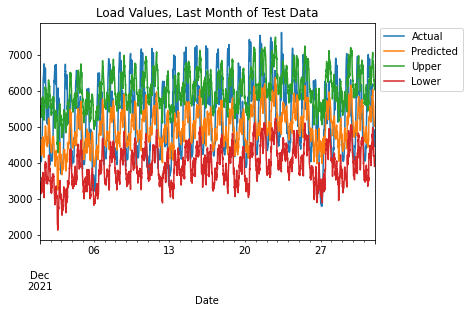

<Figure size 432x288 with 0 Axes>

In [241]:
plt1 = last_month_test.plot(x='Date', y=['Actual', 'Predicted', 'yhat_upper', 'yhat_lower'], title='Load Values, Last Month of Test Data')
# plt1.legend(["Actual"], bbox_to_anchor=(1.0,1.0))
# plt1 = new_df.plot(x="Date", y= ["Predicted", 'yhat_upper', 'yhat_lower'], ax=plt1, title= "Matic")
plt1.legend(['Actual', "Predicted", "Upper", "Lower"], bbox_to_anchor=(1.0,1.0))
plt.show()
plt.savefig('last_month_test_complete_data.jpg')

## Getting RMSE error

In [155]:
from sklearn.metrics import mean_squared_error
import numpy as np

rms = np.sqrt(mean_squared_error(df_test['y'], test_forecast['yhat']))

In [156]:
rms

1095.5371352166635

In [157]:
df_test['ds'][:-1]

0       2020-03-14 09:30:00
1       2020-03-14 09:45:00
2       2020-03-14 10:00:00
3       2020-03-14 10:15:00
4       2020-03-14 10:30:00
                ...        
63124   2021-12-31 22:30:00
63125   2021-12-31 22:45:00
63126   2021-12-31 23:00:00
63127   2021-12-31 23:15:00
63128   2021-12-31 23:30:00
Name: ds, Length: 63129, dtype: datetime64[ns]

In [158]:
test_forecast['ds']

0       2020-03-14 09:30:00
1       2020-03-14 09:45:00
2       2020-03-14 10:00:00
3       2020-03-14 10:15:00
4       2020-03-14 10:30:00
                ...        
63125   2021-12-31 22:45:00
63126   2021-12-31 23:00:00
63127   2021-12-31 23:15:00
63128   2021-12-31 23:30:00
63129   2021-12-31 23:45:00
Name: ds, Length: 63130, dtype: datetime64[ns]

In [159]:
# df_test['ds'] = pd.to_datetime(df_test['ds'])

In [160]:
# df_test

In [161]:
df_test['y'].mean()

6225.6996521463425

In [162]:
mx = df_test['y'].max()
mn = df_test['y'].min()

In [163]:
nrmse = rms/(mx - mn)

In [164]:
nrmse

0.10153545837388096

## Create future Dataframes

In [104]:
future = saved_mv_model.make_future_dataframe(periods=5*96, freq='H')

In [105]:
future.head()

,ds
0,2018-01-01 00:00:00
1,2018-01-01 00:15:00
2,2018-01-01 00:30:00
3,2018-01-01 00:45:00
4,2018-01-01 01:00:00


## Make future forecast

In [97]:
forecast = saved_mv_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
134822,2020-12-19 19:45:00,5767.066880,4520.098270,6990.705614
134823,2020-12-19 20:45:00,5791.977770,4638.550668,6997.430183
134824,2020-12-19 21:45:00,5607.835671,4354.073637,6877.913808
134825,2020-12-19 22:45:00,5323.499314,4141.306254,6635.186989
134826,2020-12-19 23:45:00,5055.218766,3769.207684,6302.589164


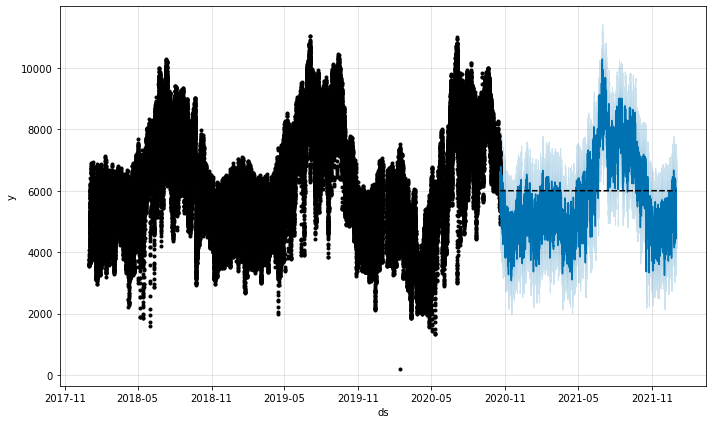

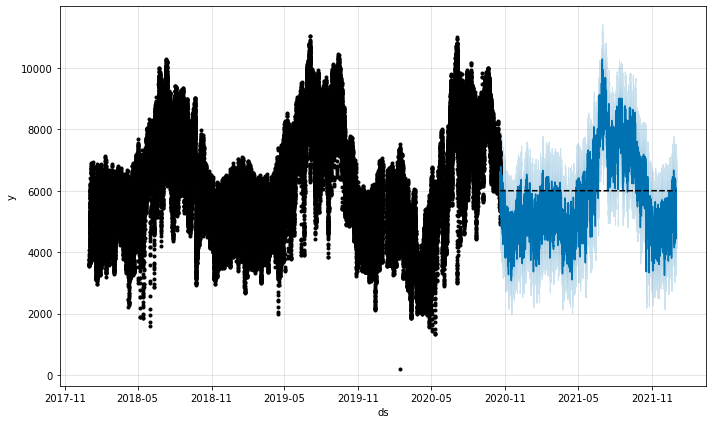

In [106]:
saved_mv_model.plot(forecast)